# 2025/2026: Ma513 — Session 1: Introduction, technical requirements

**Duration:** 2h  

**Tools:** Python, pandas, numpy, matplotlib, seaborn, scikit-learn  


> This lab follows the session 1 outline (Introduction to Machine Learning for cybersecurity). Its purpose is to give an introduction to some basic ML notions in order to discuss how to set up a ML environment where we will do the entire coding for the rest of chapters. The `scikit learn` package is complete and should be consulted whenever necessary.

## 1. Data Exploration and Preparation

In this exercise, we will work on data exploration and preparation.

In [112]:
# If you are missing a package, install it in your environment, e.g.:
# !pip install package ...
import numpy as np, pandas as pd
import random
import matplotlib.pyplot as plt

RANDOM_STATE = 42 # define a constant seed value
np.random.seed(RANDOM_STATE) # sets the seed for NumPy's random number generator
random.seed(RANDOM_STATE)  # sets the seed for Python's built-in random module

1. In the following, we generate a synthetic dataset.

In [113]:
# Create a small security-inspired dataset for exploration
n = 5000
malicious_rate = 0.02

def random_tld():
    return np.random.choice(['com','net','org','ru','cn','top','xyz','info','co','dev'],
                            p=[.25,.12,.1,.08,.08,.08,.08,.08,.07,.06])

is_mal = (np.random.rand(n) < malicious_rate).astype(int)

url_length = np.random.normal(60, 15, n).astype(int)
num_digits = np.random.poisson(3, n)
has_ip = (np.random.rand(n) < 0.07).astype(int)
tld = np.array([random_tld() for _ in range(n)])
hour = np.random.randint(0, 24, n)
bytes_out = np.abs(np.random.normal(50_000, 20_000, n)).astype(float)

# add some realistic patterns
url_length += is_mal * np.random.randint(20, 60, n)
num_digits += is_mal * np.random.randint(2, 10, n)
has_ip = np.where(is_mal & (np.random.rand(n) < 0.4), 1, has_ip)
bytes_out = np.where(is_mal, bytes_out + np.random.randint(30_000, 90_000, n), bytes_out)

# add missing values + outliers
tld[np.random.rand(n) < 0.03] = None
bytes_out[np.random.rand(n) < 0.01] = np.nan
bytes_out[np.random.rand(n) < 0.02] *= 10

df = pd.DataFrame({
    "url_length": url_length,
    "num_digits": num_digits,
    "has_ip": has_ip,
    "tld": tld,
    "hour": hour,
    "bytes_out": bytes_out,
    "is_malicious": is_mal
})

df.head()

,url_length,num_digits,has_ip,tld,hour,bytes_out,is_malicious
0,51,1,0,com,1,48248.625794,0
1,24,3,0,com,21,28206.591280,0
2,53,1,0,com,9,46182.166308,0
3,73,4,0,com,20,56789.700942,0
4,68,2,0,com,21,3825.172026,0


2.
- Use **df.info()** and **df.describe()** to inspect the dataset.
- Identify columns with missing values.
- Compute the class balance: what % of events are malicious?
- Plot histograms for numeric features (url_length, bytes_out).
- Plot bar charts for tld (top 10).
- Discuss: which features seem useful to distinguish malicious vs. normal events?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url_length    5000 non-null   int64  
 1   num_digits    5000 non-null   int64  
 2   has_ip        5000 non-null   int64  
 3   tld           5000 non-null   object 
 4   hour          5000 non-null   int64  
 5   bytes_out     4941 non-null   float64
 6   is_malicious  5000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 273.6+ KB
is_malicious
0    98.02
1     1.98
Name: count, dtype: float64


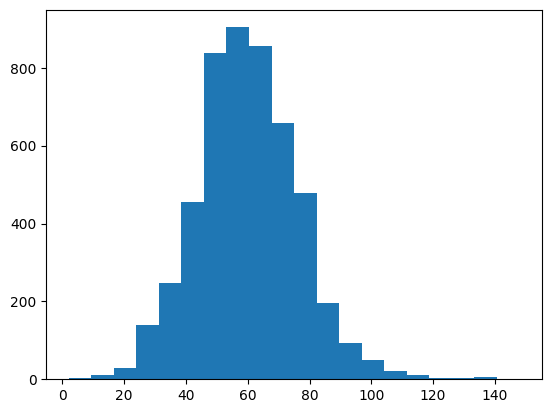

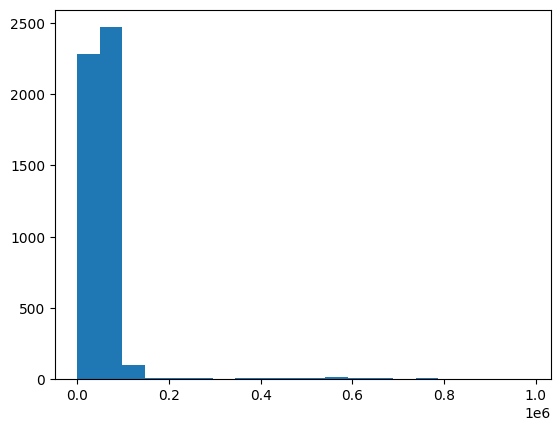

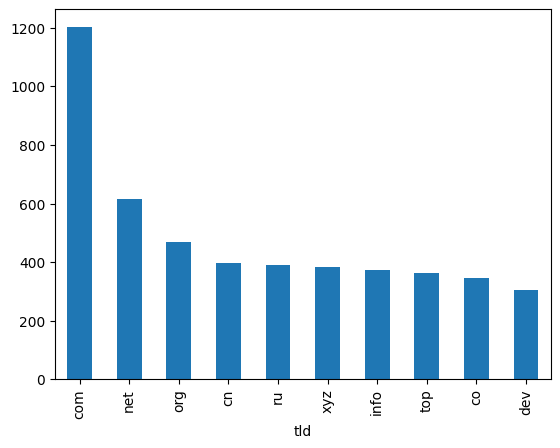

In [114]:
# TODO: your code
df.info()
df.describe()
# missing value is in bytes_out
print(df.is_malicious.value_counts()/len(df)*100)
# histogramme pour afficher la taille des URL
plt.hist(df.url_length, bins=20)
plt.show()
# histogramme pour afficher la taille des bit de sorties
plt.hist(df.bytes_out, bins=20)
plt.show()
# bar pour afficher l'utilisation des noms de domaines
df.tld.value_counts()[:10].plot(kind='bar')
plt.show()
# le nombre de bit de sorties et la taille de l'url

3.

3.1 Handle missing values:

- Fill bytes_out with median or mean.
- Replace missing tld with "unknown".

3.2 Detect & handle outliers:

- Plot a boxplot for bytes_out.
- Decide on a rule to clip extreme values (e.g., above 99th percentile).

3.3 Encode categorical data:

- Convert tld to dummy variables with **pd.get_dummies**.
- Inspect the resulting dataframe shape.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url_length    5000 non-null   int64  
 1   num_digits    5000 non-null   int64  
 2   has_ip        5000 non-null   int64  
 3   tld           5000 non-null   object 
 4   hour          5000 non-null   int64  
 5   bytes_out     5000 non-null   float64
 6   is_malicious  5000 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 273.6+ KB


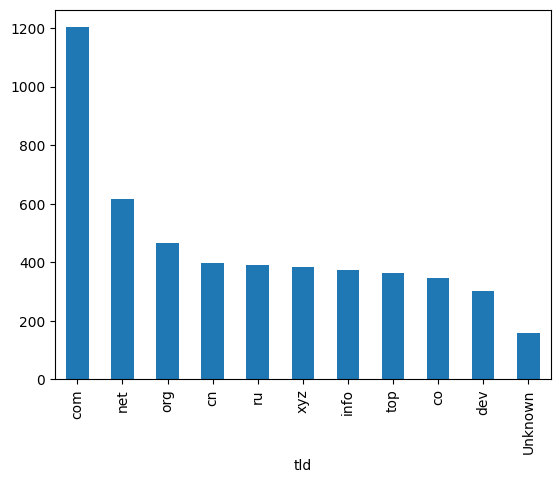

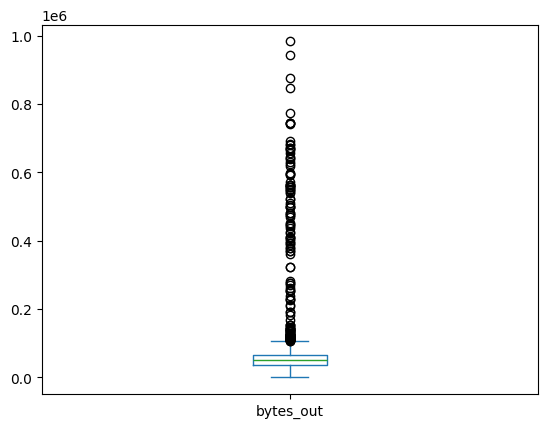

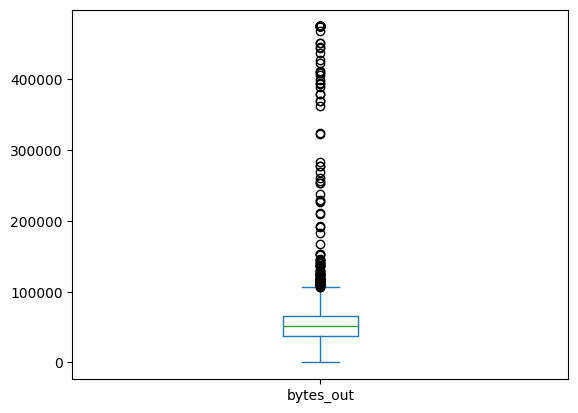

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   url_length    5000 non-null   int64  
 1   num_digits    5000 non-null   int64  
 2   has_ip        5000 non-null   int64  
 3   hour          5000 non-null   int64  
 4   bytes_out     5000 non-null   float64
 5   is_malicious  5000 non-null   int64  
 6   tld_Unknown   5000 non-null   bool   
 7   tld_cn        5000 non-null   bool   
 8   tld_co        5000 non-null   bool   
 9   tld_com       5000 non-null   bool   
 10  tld_dev       5000 non-null   bool   
 11  tld_info      5000 non-null   bool   
 12  tld_net       5000 non-null   bool   
 13  tld_org       5000 non-null   bool   
 14  tld_ru        5000 non-null   bool   
 15  tld_top       5000 non-null   bool   
 16  tld_xyz       5000 non-null   bool   
dtypes: bool(11), float64(1), int64(5)
memory usage: 288.2 KB


In [115]:
# TODO: your code
#3.1

df['bytes_out'] = df['bytes_out'].fillna(df['bytes_out'].mean())
df.info()

"""
median :

df['bytes_out'] = df['bytes_out'].fillna(df['bytes_out'].median())
df.info()
"""

df['tld'] = df['tld'].replace('None','Unknown')
df.tld.value_counts().plot(kind='bar')
plt.show()

#3.2

df.bytes_out.plot(kind='box')
plt.show()

df['bytes_out'] = df['bytes_out'].clip(upper=df['bytes_out'].quantile(0.99))
df.bytes_out.plot(kind='box')
plt.show()

#3.3

df = pd.get_dummies(df, columns=['tld'])
df.shape
df.info()

4.
- Compute correlations between numeric variables
- Compute mean url_length separately for malicious vs. benign
- Create scatterplots (url_length vs. bytes_out) and color points by is_malicious
- Discuss: which features might be predictive?

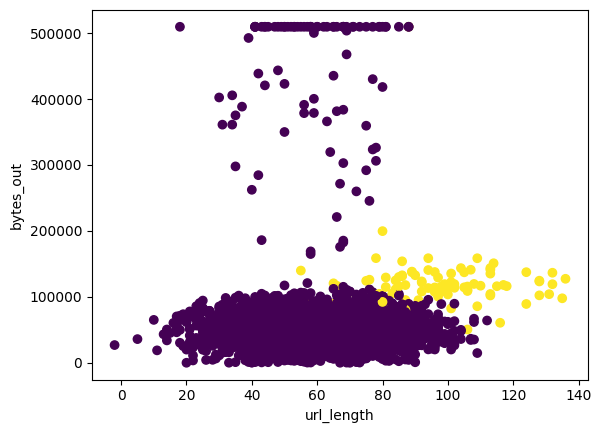

In [79]:
# TODO: your code
df.corr()

df.groupby('is_malicious')['url_length'].mean()

plt.scatter(df['url_length'], df['bytes_out'], c=df['is_malicious'])
plt.xlabel('url_length')
plt.ylabel('bytes_out')
plt.show()

#due to the fact that majority of malicious url is long, we can use that to predict


## 2. Generating Text unisng Markov Chain

Markov chains are a great way to generate text because they model how likely one "state" (word, character, etc.) follows another. In this exercise, we discover how to generate text using Markov chains.

1. Start by importing the relevant python package. `markovify` librairy simplifies the process of building and using Markov chain models for text generation.

In [52]:
# TODO: Your code
#1
import markovify

2. Load the data `airport_reviews.csv` then analyze it.

In [53]:
# TODO: Your code
#2
data=pd.read_csv("./data/airport_reviews.csv")
data.head()

,content
0,The airport is certainly tiny! Arriving there ...
1,Small airports are generally intimate friendly...
2,Waited an hour in a corridor for baggage but o...
3,The previous comment is so off the mark it mus...
4,The airport resulbles a shack. A very bad cafe...


We join the individual reviews into one large string and build a Markov chain model using the airport review text. The library will then compute the transition word probabilities from text.

In [56]:
from itertools import chain
N=100
review_subset=data["content"][0:N] #data contains the imported dataset
text="".join(chain(review_subset))
markov_chain_model=markovify.Text(text)

2. Generate five sentences using the Markov chain model and anaylze the output.

In [60]:
# TODO: Your code
#2
for i in range(5):
    print(markov_chain_model.make_sentence())

Had to go that far?
Nowadays very nice check in with Brussels airlines : the airline thought 30 mins minimum.DEL-BRU-GVA.
Luggage takes average up to 20 minutes to get file our lost luggage claim in Paris.
Tickets must be purchased before boarding the bus driver to let those involved know.
Very inefficient and hostile airport.This is one of its main duties.


3. Generate now three sentences with a length no more than 140 characters, then analyze the output.

In [61]:
# TODO: Your code
#3
for i in range(3):
    print(markov_chain_model.make_short_sentence(140))

If you are in need of an upgrade but that's OK with me since it's easy to travel into the City Centre by train or bus.
Tickets must be purchased before boarding the bus drops passengers at a door that is a small fortune.OTP in fact is two airports in Europe.
But it is cheap to travel through.


## 3. Time series

Time series analysis is a very powerful tool for predicting cyberattacks, because most cyberattacks are preceded by measurable patterns or anomalies over time. In this execise, we wil demonstrate several methods for making using time series data.

1. Start by generating a time series. Then plot your data.

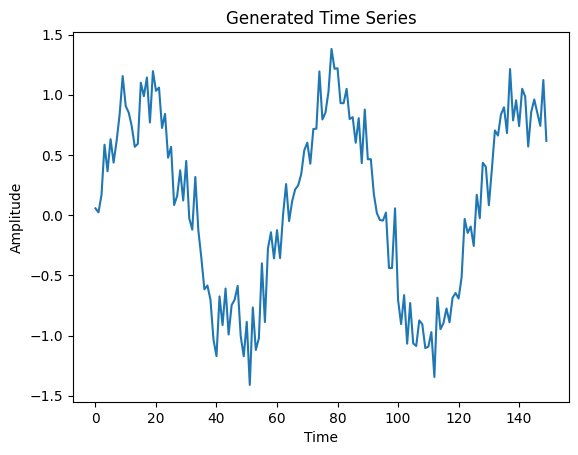

In [66]:
# TODO: Your code
#1
time = np.arange(0,150)
amplitude = np.sin(time * 0.1) + np.random.normal(0, 0.2, size=len(time))
plt.plot(time, amplitude)
plt.title("Generated Time Series")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

There is a large variety of techniques that we can use to predict the consequent value of a time series. Such as the autoregression (AR), the moving average (MA) and the simple exponential smoothing (SES).Train those three different models and compare the different resulting predictions.   

In [106]:
# TODO: Your code
from statsmodels.tsa.ar_model import AutoReg # AutoReg
from statsmodels.tsa.arima.model import ARIMA # Arima.model
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Train AutoReg (AR) model
ar_model = AutoReg(amplitude, lags=15)
ar_results = ar_model.fit()
ar_predictions = ar_results.predict(start=len(time), end=len(time) + 10)

# Train ARIMA model
arima_model = ARIMA(amplitude, order=(5, 1, 0))
arima_results = arima_model.fit()
arima_predictions = arima_results.predict(start=len(time), end=len(time) + 10)

# Train SES model
ses_model = SimpleExpSmoothing(amplitude)
ses_results = ses_model.fit()
ses_predictions = ses_results.predict(start=len(amplitude), end=len(amplitude) + 10)

print("AR Predictions:", ar_predictions)
print("ARIMA Predictions:", arima_predictions)
print("SES Predictions:", ses_predictions)


AR Predictions: [ 0.87770085  0.63408968  0.47973617  0.56833803  0.38516093  0.27757779
  0.20266466  0.20884283  0.14560404  0.0796205  -0.04870258]
ARIMA Predictions: [0.84066071 0.77833574 0.7527836  0.8002996  0.70216872 0.78052397
 0.73695131 0.74105719 0.74803965 0.73006662 0.74817106]
SES Predictions: [0.76332492 0.76332492 0.76332492 0.76332492 0.76332492 0.76332492
 0.76332492 0.76332492 0.76332492 0.76332492 0.76332492]


2. Describe the obtained results.

In [107]:
# TODO: Your code
#SES is constant, AR decay toward zero and ARIMA got litle oscilation

## 4. Natural Langage Processing

It is essential in cybersecurity to work with text data. Il this exercise, you will discover the important tools to convert such data into numerical features.

Consider now the following dataset consisting of an excerpt of conversations taking place on an Internet Relay Channel (IRC) `anopops`.

In [1]:
with open("./data/anonops_short.txt", encoding="utf8") as f:
    anonops_chat_logs = f.readlines()

In [2]:
anonops_chat_logs

['--- Log opened Mon Sep 19 23:57:20 2016\n',
 '23:57 -!- Skyy [webirc@AN-n43.q1s.sdi0aj.IP] has joined #anonops\n',
 "23:57 < AnonymousJohn> that's weird\n",
 '23:57 < geezus> more like #snobby amirite\n',
 '23:58  * AnonymousJohn dies of laughter\n',
 '23:58 -!- annonytrace [webirc@AN-14l.j7r.d0qrlu.IP] has quit [Ping timeout: 121 seconds]\n',
 '23:59 -!- ole1eye [ole1eye@AN-s5b.gdf.j17iqm.IP] has joined #anonops\n',
 '23:59 < AnonymousJohn> ^^ annonytrace is my aunt\n',
 '--- Day changed Tue Sep 20 2016\n',
 '00:00 -!- BobMay [Public@AN-nqq.cgg.7tuc3r.IP] has joined #anonops\n',
 '00:00 -!- Clunk [clunk@AN-r5g.h92.dq7njm.IP] has quit [Connection closed]\n',
 '00:01 < AnonymousJohn> alright gotsta go. Be back in a lil bit\n',
 '00:01 -!- RevenantGhost [TheRevenant@AN-rms.4bj.j959f1.IP] has quit [Quit: Leaving]\n',
 '00:01 -!- AnonymousJohn [AnonymousJo@AN-oc2.43s.02llv5.IP] has quit [Quit: Leaving]\n',
 '00:01 -!- Guest40341 [AndChat2541@AN-pl0gl1.8e2d.64f9.r226rd.IP] has quit [Quit:

1. Convert the given collection of text documents into a numerical representation that can be used by Machine Learning algorithms. Your output should be a sparse matrix, where each row corresponds to one document and each column corresponds to a word or token.

In [4]:
# TODO: Your code
#1
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import HashingVectorizer
vectorizer = CountVectorizer(stop_words="english", binary=False)
X = vectorizer.fit_transform(anonops_chat_logs)
mat = X.toarray()
print(mat)
print(X[0])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 9 stored elements and shape (1, 60602)>
  Coords	Values
  (0, 34359)	1
  (0, 40369)	1
  (0, 36946)	1
  (0, 48792)	1
  (0, 1076)	1
  (0, 1614)	1
  (0, 3424)	1
  (0, 1429)	1
  (0, 1460)	1


2. Describe the obtained results.

In [ ]:
# TODO: Your code
# (Write a short text here summarizing your findings)
#he create an array with the binary code of each character per row (using ASCII)


## 5. Standardizing data

In many Machine Learning algorithms, performance is highly sensitive to the relative scale of features.

1. Start by importing the required librairies and gathering a dataset, `X` from `file_pe_headers.csv`. This dataset contains various files malicious signature probably sourced from Virus.

In [5]:
# TODO: Your code
#1
import pandas as pd

# Define the file path
file_path = './data/file_pe_headers.csv'

# Load the dataset X
X = pd.read_csv(file_path)
X.head()


,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SectionMaxChar,SectionMainChar,DirectoryEntryImport,DirectoryEntryImportSize,DirectoryEntryExport,ImageDirectoryEntryExport,ImageDirectoryEntryImport,ImageDirectoryEntryResource,ImageDirectoryEntryException,ImageDirectoryEntrySecurity
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,3758096608,0,7,152,0,0,54440,77824,73728,0
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,3791650880,0,16,311,0,0,262276,294912,0,346112
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,3221225536,0,6,176,0,0,36864,40960,0,0
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,3224371328,0,8,155,0,0,356352,1003520,0,14109472
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,3227516992,0,2,43,0,0,61440,73728,0,90624


2. Next, standardize `X`. How the new dataset looks like?

In [10]:
# TODO: Your code
#2
import numpy as np
from sklearn.preprocessing import StandardScaler

# Select only numerical columns
X_numeric = X.select_dtypes(include=np.number)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)
print(X_scaled)

[[ 0.         -0.03506542 -0.04751096 ... -0.07054894 -0.0198525
  -0.04066791]
 [ 0.         -0.03506542 -0.04751096 ... -0.03849221 -0.02110877
  -0.02469983]
 [ 0.         -0.03506542 -0.04751096 ... -0.07599254 -0.02110877
  -0.04066791]
 ...
 [ 0.         -0.18093613 -0.04958686 ... -0.07296832 -0.02110877
  -0.04066791]
 [ 0.         -0.03506542 -0.04751096 ... -0.06691988 -0.02110877
  -0.04066791]
 [ 0.         -0.03506542 -0.04751096 ...  0.00021781 -0.02110877
  -0.04066791]]


3. Knowing that with a large feature space, it is critical to have a large amount of data for the model to be accurate. That is why we often employ dimensionality reduction techniques such as `Principal Components Analysis (PCA)`. Instantiate a PCA instance and use it to reduce the dimensionality of our data.

In [11]:
# TODO: Your code
#3
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
print(X_pca)

[[-1.15589929e-01  1.02716804e-02  2.43663049e+00 ...  8.19826817e-02
   2.84327126e-02 -8.20211642e-04]
 [-2.97019218e-01 -1.51638422e-01 -4.94586452e-01 ...  3.55886262e-02
  -1.98931825e-02 -2.81884674e-01]
 [-2.98190138e-01 -1.82778568e-01 -1.25509593e+00 ...  4.00939817e-03
   1.20345794e-02  2.86820250e-01]
 ...
 [ 6.02167392e-01  2.70238418e-02  1.65054804e+00 ...  4.45705349e-02
   8.06789376e-02 -1.12298594e-01]
 [-2.73569006e-01  2.18332319e-02  8.28146859e-01 ...  2.83439569e-02
  -2.07943743e-03 -1.39397171e-01]
 [-4.24837928e-01 -2.03780033e-02  4.42254873e-01 ... -4.06910607e-01
  -3.31281377e-02 -9.32608777e-01]]


4. Assess then the effectiveness of your dimensionality reduction.

In [12]:
# TODO: Your code
#4
print(pca.explained_variance_ratio_)

[0.1120992  0.05959476 0.05707361 0.04911509 0.04082757 0.03388062
 0.03273205 0.03107108 0.02844734 0.02820143 0.0251243  0.02375419
 0.02302316 0.02106487 0.01811549 0.01715951 0.01670903 0.01613289
 0.01505043 0.01444864 0.01437292 0.01434621 0.01426336 0.0142124
 0.0140916  0.0137448  0.01358264 0.01319205 0.01318092 0.01228661
 0.01208879 0.01138199 0.01127905 0.01094027 0.01055353 0.01007308
 0.00976684 0.00971089 0.00913979 0.00896082 0.00859421 0.00697361
 0.00674721 0.00640111 0.00586998 0.00583252 0.00546932]
